[ mini_speech_commands 데이터셋으로 음성 인식에 대한 기계 학습 모델 연습 ]

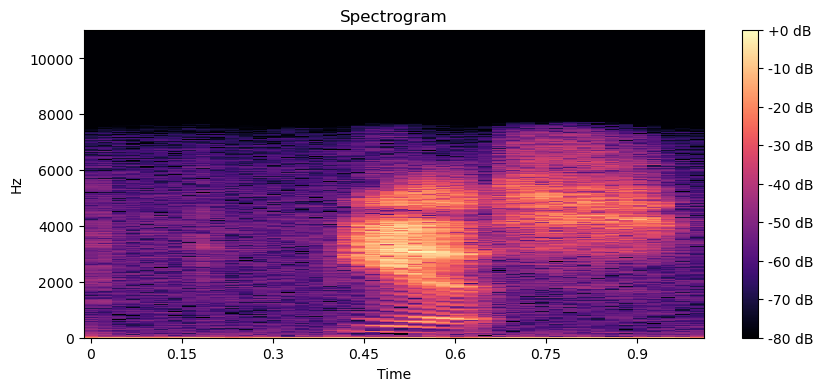

In [1]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pathlib
import numpy as np


DATASET_PATH = 'data/mini_speech_commands'
data_dir = pathlib.Path(DATASET_PATH)

yes_files = list(data_dir.glob('yes/*'))
audio_path = yes_files[0]


y, sr = librosa.load(audio_path)

D = librosa.stft(y)
S_DB = librosa.amplitude_to_db(abs(D), ref=np.max)


plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

Processing command: down


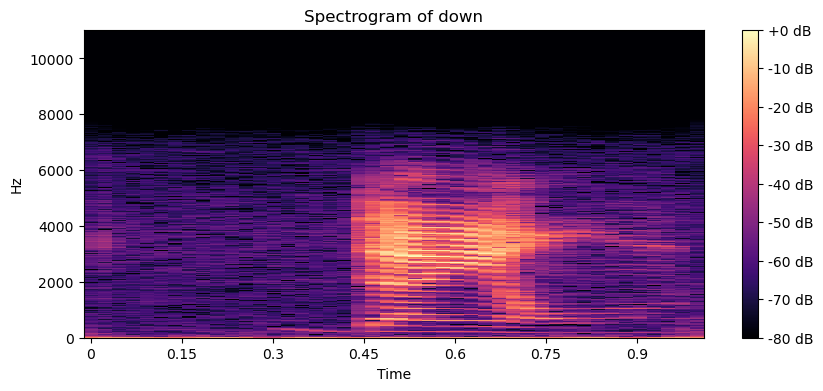

Processing command: go


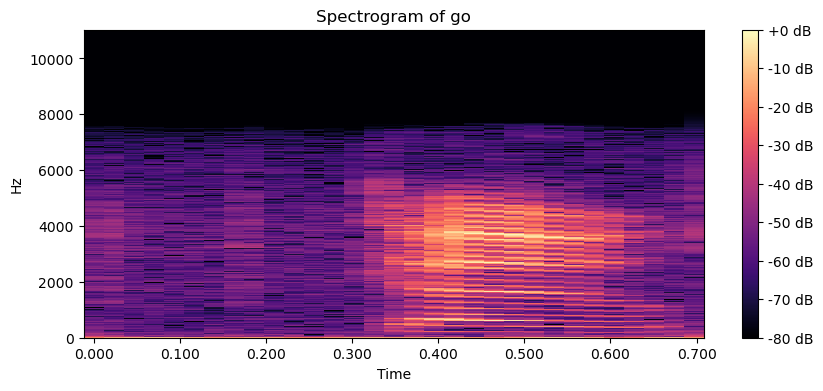

Processing command: left


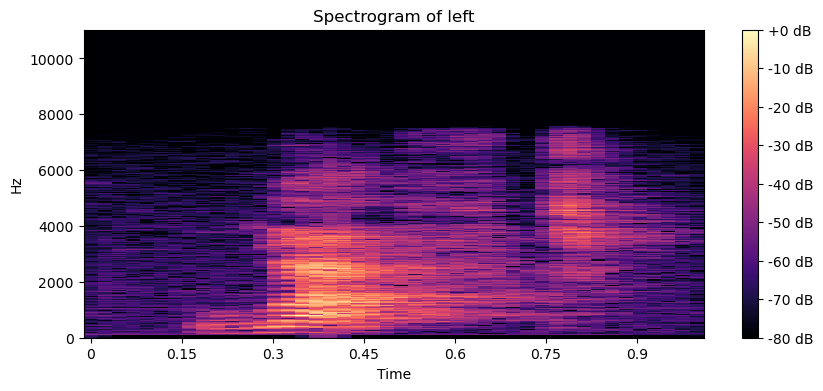

Processing command: no


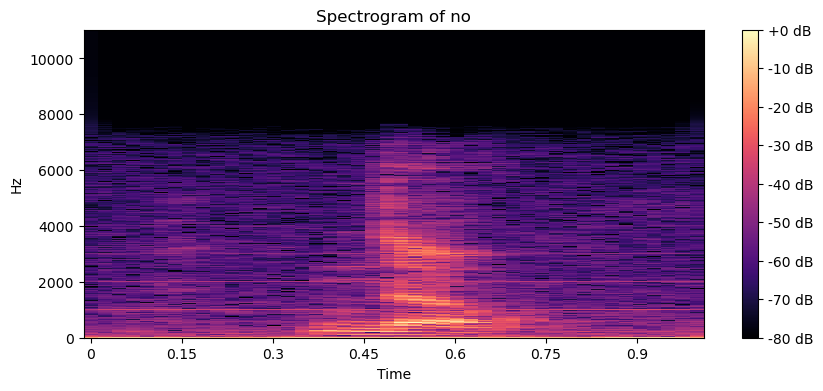

Processing command: right


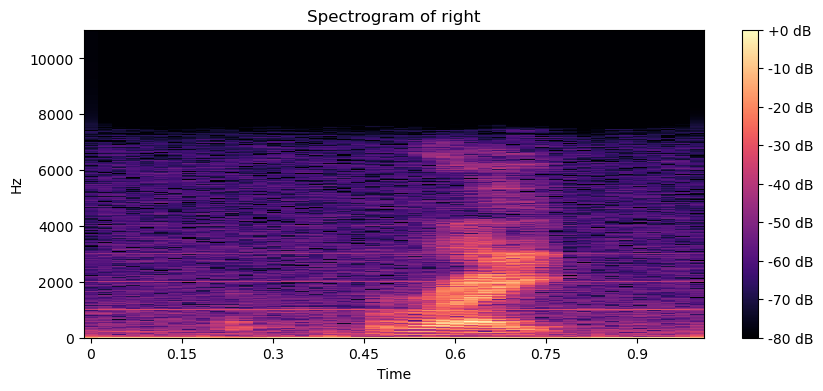

Processing command: stop


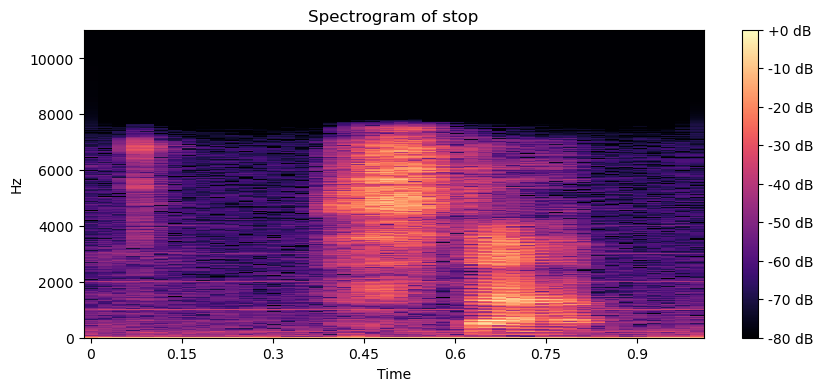

Processing command: up


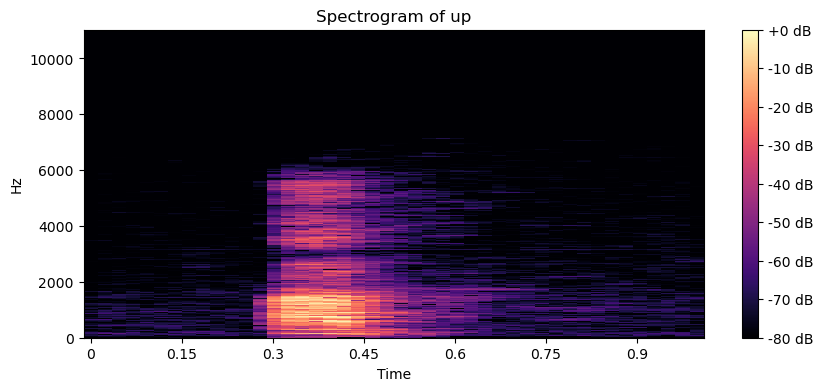

Processing command: yes


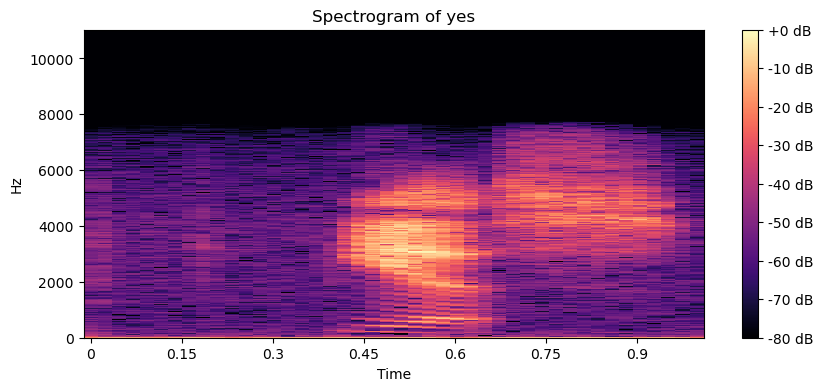

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pathlib
import numpy as np


DATASET_PATH = 'data/mini_speech_commands'
data_dir = pathlib.Path(DATASET_PATH)


commands = ['down', 'go' ,'left' ,'no', 'right' ,'stop' ,'up' ,'yes']


for command in commands:
    print(f"Processing command: {command}")
    command_files = list(data_dir.glob(f'{command}/*'))
    if command_files:
        audio_path = command_files[0]  
        y, sr = librosa.load(audio_path)  

        D = librosa.stft(y)
        S_DB = librosa.amplitude_to_db(abs(D), ref=np.max)

        
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='hz')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Spectrogram of {command}')
        plt.show()
    else:
        print(f"No files found for command: {command}")


In [3]:
import IPython.display as ipd
import librosa
import pathlib

DATASET_PATH = 'data/mini_speech_commands'
data_dir = pathlib.Path(DATASET_PATH)

commands = ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']

for command in commands:
    command_files = list(data_dir.glob(f'{command}/*'))
    if command_files:
        audio_path = command_files[0]  # 첫 번째 파일 사용
        print(f"Playing the first audio file for command: {command}")
        display(ipd.Audio(str(audio_path)))  # 오디오 파일 재생
    else:
        print(f"No files found for command: {command}")

Playing the first audio file for command: down


Playing the first audio file for command: go


Playing the first audio file for command: left


Playing the first audio file for command: no


Playing the first audio file for command: right


Playing the first audio file for command: stop


Playing the first audio file for command: up


Playing the first audio file for command: yes


단계 1: 데이터 로딩 및 특징 추출

In [4]:
import numpy as np
import pandas as pd
import librosa
import pathlib
import os


DATASET_PATH = 'data/mini_speech_commands'
data_dir = pathlib.Path(DATASET_PATH)
commands = ['down', 'go', 'left', 'no', 'right', 'stop', 'up', 'yes']


features = []
labels = []


for command in commands:
    command_files = list(data_dir.glob(f'{command}/*'))
    for audio_path in command_files:
        y, sr = librosa.load(audio_path, sr=None)
        
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfcc_processed = np.mean(mfcc.T, axis=0)  
                
        features.append(mfcc_processed)
        labels.append(command)

features = np.array(features)
labels = np.array(labels)


단계 2: 데이터 전처리 및 분할

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


X_train, X_test, y_train, y_test = train_test_split(features, labels_encoded, test_size=0.2, random_state=42)


단계 3: 머신러닝 모델 학습


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.44


0.44가 나오면 모델 재성능 개선작업
1. 데이터 전처리 : 오디오 신호 노이즈 감소(배경잡음감소), 데이터 증강 (속도변화 , 피치변환,잡음추가등)
2. 특징 추출 방법 변경 : mfcc 계수 증가 , 크로마특징 , 스펙트럼 특징 , 제로 크로싱
3. 모델 학습 구조 및 알고리즘 변경 : 앙상블 , 딥러닝학습 , cnn , rnn , LSTM등
4. 데이터 증강 : 학습데이터 추가 확보
5. 성능평가 재검토 : F1, 재현율 등 다른 성능평가 지표사용 , 8 classes중 어떤 클래스가 잘못 분류 되었는지 확인 = 혼동행렬